SHORT STRADDLE


Write one call and Write one put of same expiration dates and same exercise price.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Generate spot price range

In [26]:
strike_price = int(input("Enter strike price: "))
spot1 = int(input("Enter the first spot price: "))
spot_last = int(input("Enter the last spot price: "))
spot_diff = int(input("Enter the difference between spot prices: "))

spot_prices = np.arange(spot1,spot_last,spot_diff)
if spot_prices[-1] != spot_last:
    spot_prices = list(np.append(spot_prices, spot_last))


In [27]:
spot_prices

[820,
 830,
 840,
 850,
 860,
 870,
 880,
 890,
 900,
 910,
 920,
 930,
 940,
 950,
 960,
 970,
 980,
 990,
 1000,
 1010,
 1020]

Accept Premiums of Call & Put

In [29]:
prem_rec_short_call = float(input('Enter Premium Received for Shorted Call: '))
premium_short_call = [prem_rec_short_call] * len(spot_prices)

prem_rec_short_put = float(input('Enter Premium Received for Shorted Put: '))
premium_short_put = [prem_rec_short_put] * len(spot_prices)

Calculating Intrinsic Values

In [30]:
iv_call = []
payoff_short_call = []
payoff_short_put = []
net_payoff = []

In [31]:
for i in (spot_prices):
    
    if (strike_price>=i) :
        iv_call.append(0)

    elif (strike_price < i):
        temp = 0.0
        temp = strike_price - i
        iv_call.append(temp)

In [32]:
iv_call

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -10,
 -20,
 -30,
 -40,
 -50,
 -60,
 -70,
 -80,
 -90,
 -100]

In [33]:
iv_put =[]

In [34]:
for i in (spot_prices):
    if (strike_price>i) :
        temp = 0.0
        temp = i - strike_price
        iv_put.append(temp)

    elif (strike_price <= i):
        iv_put.append(0)

In [35]:
iv_put

[-100,
 -90,
 -80,
 -70,
 -60,
 -50,
 -40,
 -30,
 -20,
 -10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

Calculating Payoff for call and put

In [36]:
for i in range (len(spot_prices)):
    pnl = iv_call[i] + premium_short_call[i]
    payoff_short_call.append(pnl)
payoff_short_call

[15.35,
 15.35,
 15.35,
 15.35,
 15.35,
 15.35,
 15.35,
 15.35,
 15.35,
 15.35,
 15.35,
 5.35,
 -4.65,
 -14.65,
 -24.65,
 -34.65,
 -44.65,
 -54.65,
 -64.65,
 -74.65,
 -84.65]

In [37]:
for i in range (len(spot_prices)):
    pnl = iv_put[i] + premium_short_put[i]
    payoff_short_put.append(pnl)
payoff_short_put

[-82.15,
 -72.15,
 -62.15,
 -52.15,
 -42.15,
 -32.15,
 -22.15,
 -12.149999999999999,
 -2.1499999999999986,
 7.850000000000001,
 17.85,
 17.85,
 17.85,
 17.85,
 17.85,
 17.85,
 17.85,
 17.85,
 17.85,
 17.85,
 17.85]

Calculation for Net Payoff

In [38]:
for i in range (len(spot_prices)):
    pnl = payoff_short_call[i] + payoff_short_put[i]
    net_payoff.append(pnl)
net_payoff

[-66.80000000000001,
 -56.800000000000004,
 -46.8,
 -36.8,
 -26.799999999999997,
 -16.799999999999997,
 -6.799999999999999,
 3.200000000000001,
 13.200000000000001,
 23.200000000000003,
 33.2,
 23.200000000000003,
 13.200000000000001,
 3.200000000000001,
 -6.799999999999997,
 -16.799999999999997,
 -26.799999999999997,
 -36.8,
 -46.800000000000004,
 -56.800000000000004,
 -66.80000000000001]

FINAL ANSWER

In [39]:
bep_call = strike_price + prem_rec_short_call
bep_put = strike_price - prem_rec_short_put

print(f"Break-Even Price for Shorted Call = {bep_call}")
print(f"Break-Even Price for Shorted Put = {bep_put}")

Break-Even Price for Shorted Call = 935.35
Break-Even Price for Shorted Put = 902.15


In [40]:
short_call_option_data = {'Spot Prices': spot_prices, 'Short Call IV': iv_call, 'Premium Paid (Call)':premium_short_call, 'P/L (Call)':payoff_short_call}
short_call_option_data = pd.DataFrame(short_call_option_data)

short_put_option_data = {'Spot Prices': spot_prices, 'Short Put IV': iv_put, 'Premium Recieved (Put)':premium_short_put, 'P/L (Put)':payoff_short_put}
short_put_option_data = pd.DataFrame(short_put_option_data)

In [41]:
print("\n\t\t\tShort Call Option Data\n")
print(short_call_option_data)


			Short Call Option Data

    Spot Prices  Short Call IV  Premium Paid (Call)  P/L (Call)
0           820              0                15.35       15.35
1           830              0                15.35       15.35
2           840              0                15.35       15.35
3           850              0                15.35       15.35
4           860              0                15.35       15.35
5           870              0                15.35       15.35
6           880              0                15.35       15.35
7           890              0                15.35       15.35
8           900              0                15.35       15.35
9           910              0                15.35       15.35
10          920              0                15.35       15.35
11          930            -10                15.35        5.35
12          940            -20                15.35       -4.65
13          950            -30                15.35      -14.65
14          

In [42]:
print("\n\t\t\tShort Put Option Data\n")
print(short_put_option_data)


			Short Put Option Data

    Spot Prices  Short Put IV  Premium Recieved (Put)  P/L (Put)
0           820          -100                   17.85     -82.15
1           830           -90                   17.85     -72.15
2           840           -80                   17.85     -62.15
3           850           -70                   17.85     -52.15
4           860           -60                   17.85     -42.15
5           870           -50                   17.85     -32.15
6           880           -40                   17.85     -22.15
7           890           -30                   17.85     -12.15
8           900           -20                   17.85      -2.15
9           910           -10                   17.85       7.85
10          920             0                   17.85      17.85
11          930             0                   17.85      17.85
12          940             0                   17.85      17.85
13          950             0                   17.85      17.8

In [43]:
net = {'Strategy P/L': net_payoff}
net = pd.DataFrame(net)
print("\n\t\t\tNet Pay-off Of Strategy\n")
print(net)


			Net Pay-off Of Strategy

    Strategy P/L
0          -66.8
1          -56.8
2          -46.8
3          -36.8
4          -26.8
5          -16.8
6           -6.8
7            3.2
8           13.2
9           23.2
10          33.2
11          23.2
12          13.2
13           3.2
14          -6.8
15         -16.8
16         -26.8
17         -36.8
18         -46.8
19         -56.8
20         -66.8


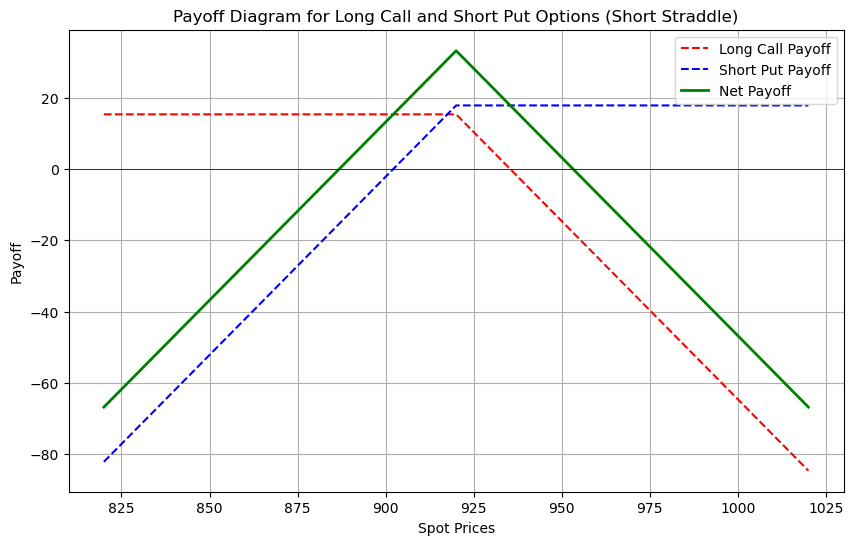

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(spot_prices, payoff_short_call, label='Long Call Payoff', color='red', linestyle='--')
plt.plot(spot_prices, payoff_short_put, label='Short Put Payoff', color='blue', linestyle='--')
plt.plot(spot_prices, net_payoff, label='Net Payoff', color='green', linewidth=2)
plt.title('Payoff Diagram for Long Call and Short Put Options (Short Straddle)')
plt.xlabel('Spot Prices')
plt.ylabel('Payoff')
plt.axhline(0, color='black', lw=0.5, ls='-')  
plt.grid(True)
plt.legend()
plt.show()